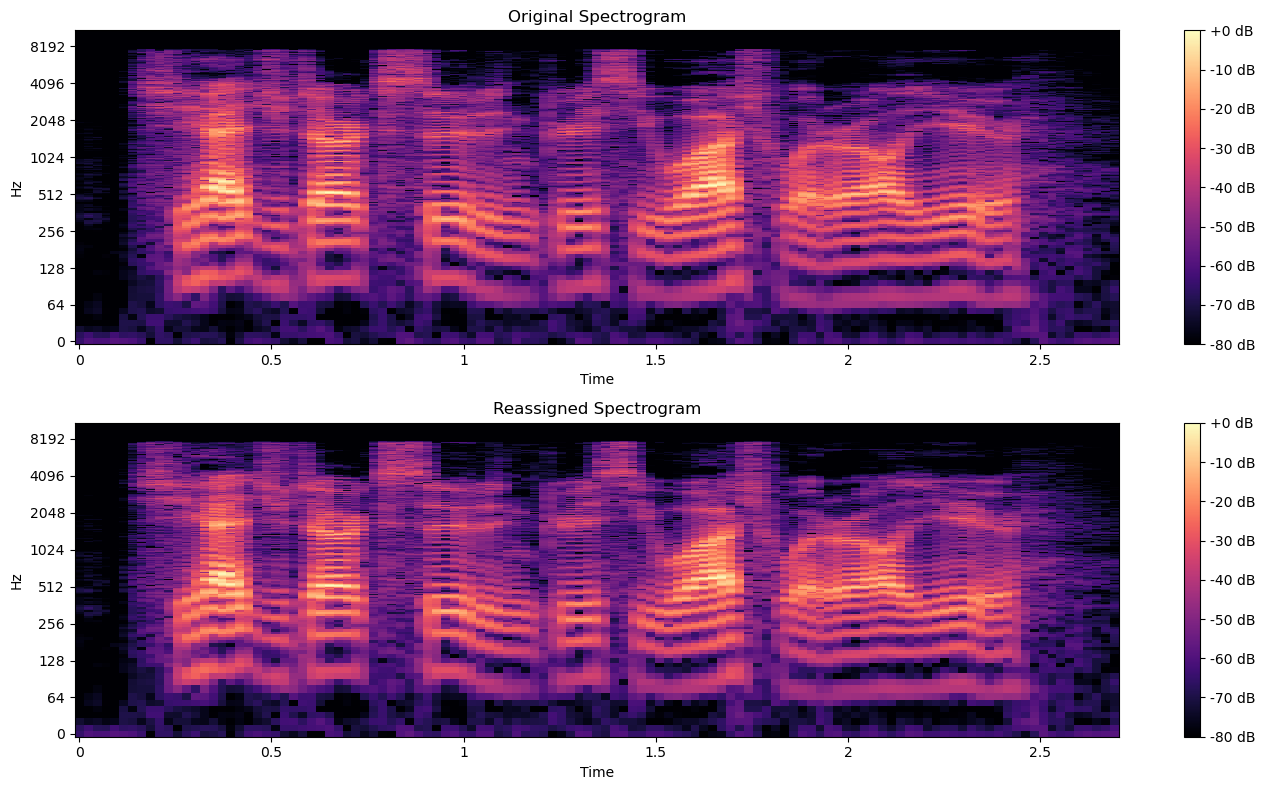

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the speech signal (you can replace 'speech.wav' with your file)
filename = '/dataHDD/chsaikeerthi/2024-chirumamilla/data/TIMIT/SA1ABC0/signal.wav'
y, sr = librosa.load(filename)

# Compute the short-time Fourier transform (STFT)
D = librosa.stft(y)

# Compute the reassigned spectrogram
reassign_frequencies, reassign_times, S = librosa.reassigned_spectrogram(y, sr=sr)

# Convert power spectrogram to decibel units for better visualization
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Plotting the original and reassigned spectrogram
plt.figure(figsize=(14, 8))

# Original spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(librosa.amplitude_to_db(np.abs(D), ref=np.max),
                         sr=sr, x_axis='time', y_axis='log', cmap='magma', n_fft=320, sr=16000, hop_length=160,win_length=320)
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')

# Reassigned spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(S_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Reassigned Spectrogram')

plt.tight_layout()
plt.show()


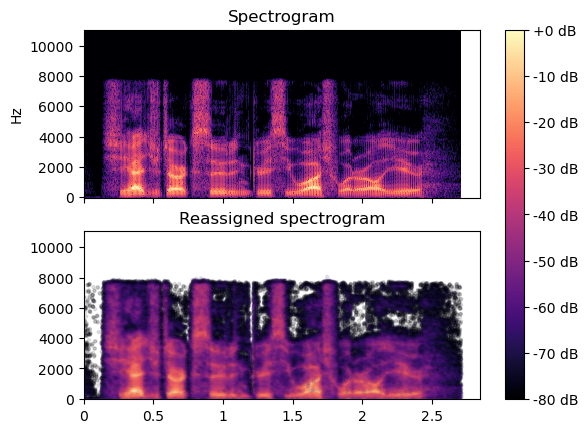

In [3]:
import matplotlib.pyplot as plt
import librosa
import librosa.display
import numpy as np
amin = 1e-10
n_fft = 320
hop_length = 160
filename = '/dataHDD/chsaikeerthi/2024-chirumamilla/data/TIMIT/SA1ABC0/signal.wav'
y, sr = librosa.load(filename)
freqs, times, mags = librosa.reassigned_spectrogram(y=y, sr=sr,
                                                    n_fft=n_fft)
mags_db = librosa.amplitude_to_db(mags, ref=np.max)
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
img = librosa.display.specshow(mags_db, x_axis="s", y_axis="linear", sr=sr,
                         hop_length=n_fft//4, ax=ax[0])
ax[0].set(title="Spectrogram", xlabel=None)
ax[0].label_outer()
ax[1].scatter(times, freqs, c=mags_db, cmap="magma", alpha=0.1, s=5)
ax[1].set_title("Reassigned spectrogram")
fig.colorbar(img, ax=ax, format="%+2.f dB")

plt.savefig('results/reassigned_spectrogram.pdf',format='pdf',dpi=800)

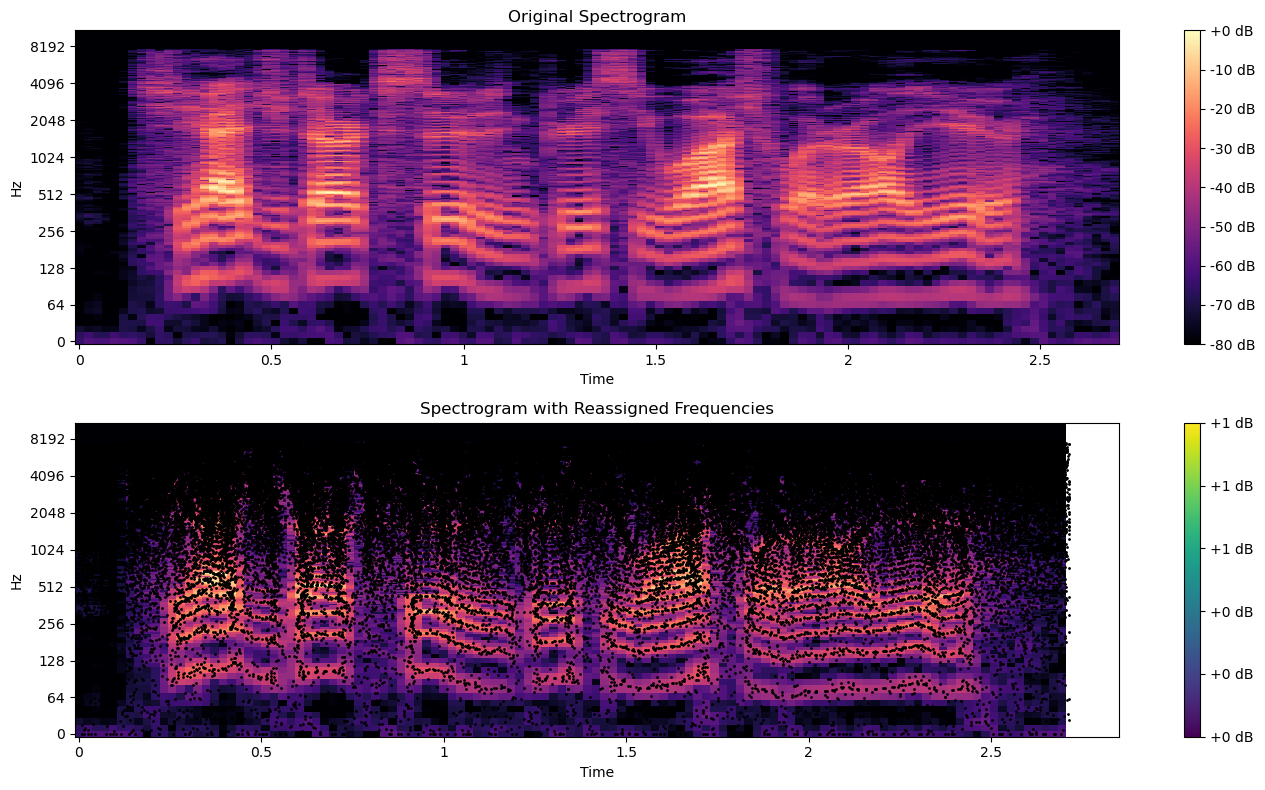

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display

# Load the speech signal (replace 'speech.wav' with your file)
filename = '/dataHDD/chsaikeerthi/2024-chirumamilla/data/TIMIT/SA1ABC0/signal.wav'
y, sr = librosa.load(filename)

# Compute the short-time Fourier transform (STFT)
D = librosa.stft(y)

# Compute the reassigned spectrogram
reassign_frequencies, reassign_times, S = librosa.reassigned_spectrogram(y, sr=sr)

# Convert power spectrogram to decibel units for better visualization
D_db = librosa.amplitude_to_db(np.abs(D), ref=np.max)
S_db = librosa.amplitude_to_db(np.abs(S), ref=np.max)

# Plotting the original spectrogram with reassigned frequencies
plt.figure(figsize=(14, 8))

# Original spectrogram
plt.subplot(2, 1, 1)
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.colorbar(format='%+2.0f dB')
plt.title('Original Spectrogram')

# Reassigned spectrogram
plt.subplot(2, 1, 2)
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log', cmap='magma')
plt.scatter(reassign_times, reassign_frequencies, c='black', s=1)
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram with Reassigned Frequencies')

plt.tight_layout()
plt.show()
